In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import collections
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
%matplotlib inline

# Data Ingestion

In [2]:
# Ingestion of training data
df = pd.read_csv('Train.csv')

In [3]:
# Printing out shape of Training data
df.shape

(23856, 18)

In [4]:
df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [5]:
# Dataframe describe
df.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [6]:
df['MULTIPLE_OFFENSE'].value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

In [7]:
# Checking distribution of classes available in dataset
df['MULTIPLE_OFFENSE'].value_counts(normalize=True)

1    0.955231
0    0.044769
Name: MULTIPLE_OFFENSE, dtype: float64

Text(0,0.5,'Count')

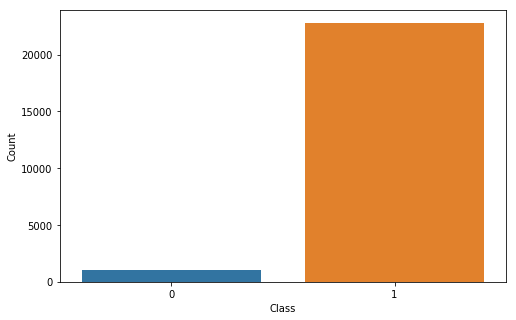

In [8]:
# Plotting out bar graph to check the distribution of classes
x = np.array(df['MULTIPLE_OFFENSE'].value_counts().index)
y = np.array(df['MULTIPLE_OFFENSE'].value_counts().values)
plt.figure(figsize=(8,5))
sns.barplot(x,y)
plt.xlabel('Class')
plt.ylabel('Count')

In [9]:
# Checking datatypes of all columns
df.dtypes

INCIDENT_ID          object
DATE                 object
X_1                   int64
X_2                   int64
X_3                   int64
X_4                   int64
X_5                   int64
X_6                   int64
X_7                   int64
X_8                   int64
X_9                   int64
X_10                  int64
X_11                  int64
X_12                float64
X_13                  int64
X_14                  int64
X_15                  int64
MULTIPLE_OFFENSE      int64
dtype: object

In [10]:
# Converting Incident Date column from string to Datetime
df['DATE']= pd.to_datetime(df['DATE'])

In [11]:
df.dtypes

INCIDENT_ID                 object
DATE                datetime64[ns]
X_1                          int64
X_2                          int64
X_3                          int64
X_4                          int64
X_5                          int64
X_6                          int64
X_7                          int64
X_8                          int64
X_9                          int64
X_10                         int64
X_11                         int64
X_12                       float64
X_13                         int64
X_14                         int64
X_15                         int64
MULTIPLE_OFFENSE             int64
dtype: object

In [12]:
# Transforming Date column to Weekend column to check whether given date is weekend or not
df['Weekend'] = df['DATE'].apply(lambda x:x.weekday())
df['Weekend'] = df['Weekend'].apply(lambda x:0 if x<5 else 1)

In [13]:
df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,Weekend
0,CR_102659,2004-07-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0,1
1,CR_189752,2017-07-18,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1,0
2,CR_184637,2017-03-15,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1,0
3,CR_139071,2009-02-13,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1,0
4,CR_109335,2005-04-13,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1,0


In [14]:
df['Weekend'].value_counts()

0    17246
1     6610
Name: Weekend, dtype: int64

In [15]:
df.groupby(['MULTIPLE_OFFENSE', 'Weekend']).size().unstack(fill_value=0)

Weekend,0,1
MULTIPLE_OFFENSE,,
0,719,349
1,16527,6261


In [16]:
# Finding out which columns has Nan values
df.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
Weekend               0
dtype: int64

In [17]:
# Finding which class containing maximum null values
nan_rows = df[df['X_12'].isnull()]
nan_rows['MULTIPLE_OFFENSE'].value_counts()

1    182
Name: MULTIPLE_OFFENSE, dtype: int64

In [18]:
# Dropping out Incident Id and Date columns
df.drop(['INCIDENT_ID', 'DATE'], axis = 1, inplace = True)

In [19]:
df.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,Weekend
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0,1
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1,0
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1,0
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1,0
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1,0


In [20]:
# Dropping out Weekend column
columns_list = df.columns
columns_list = columns_list.drop('Weekend')
columns_list

Index(['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10',
       'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'MULTIPLE_OFFENSE'],
      dtype='object')

In [21]:
df2 = df[columns_list]
df2.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


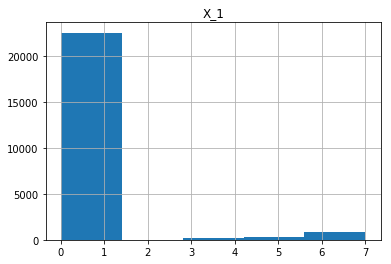

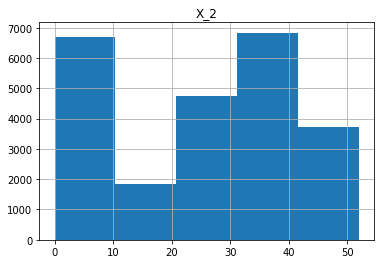

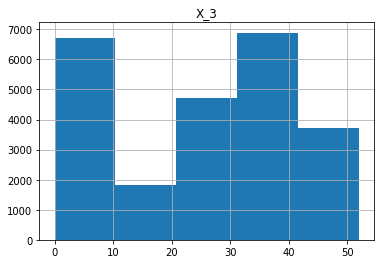

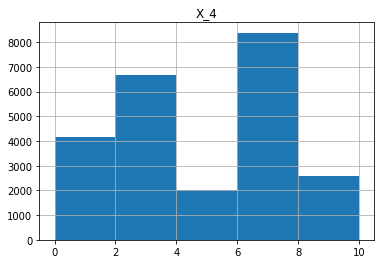

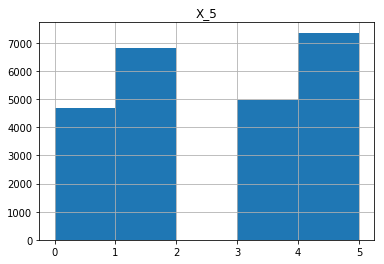

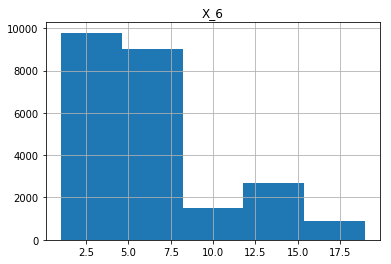

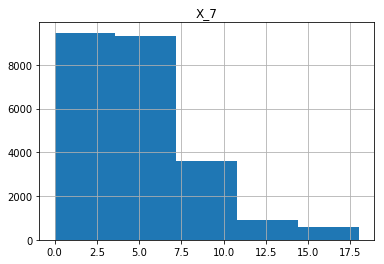

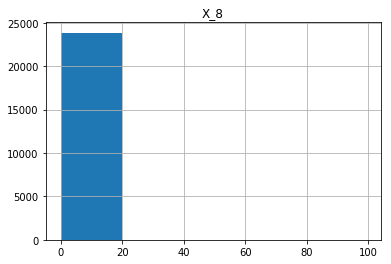

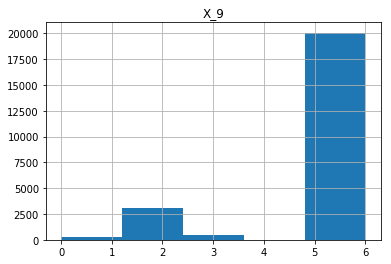

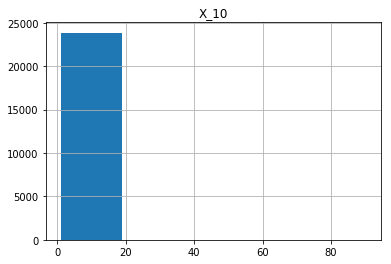

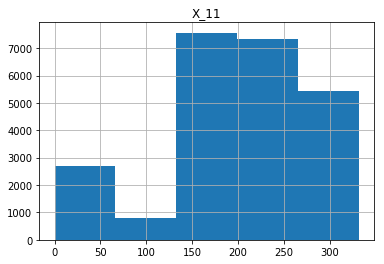

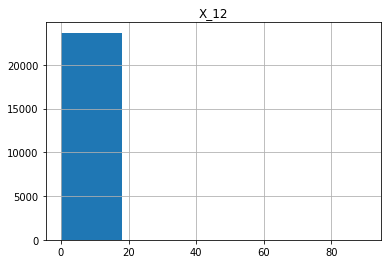

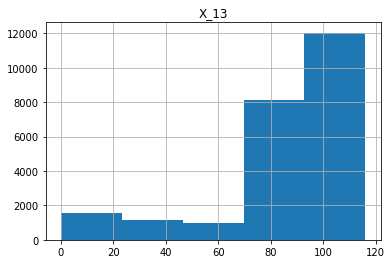

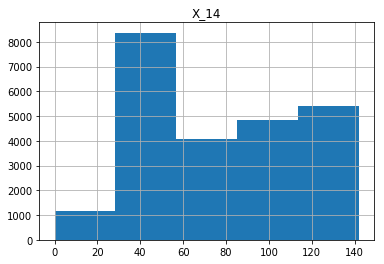

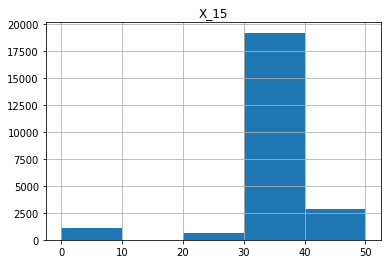

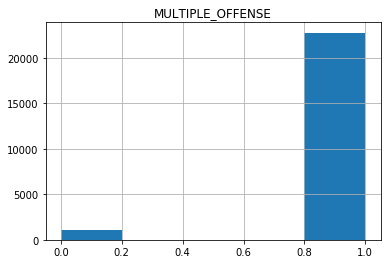

In [22]:
# Checking out the distribution of columns
for columns in columns_list:
    df2.hist(column=columns, bins=5)

In [23]:
# Splitting the data into training and test data
X = df2.iloc[:, :-1]
Y = df2['MULTIPLE_OFFENSE']
seed = 2
test_size = 0.25
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [24]:
# Checking distribution of classes in Train & Test data
print(y_train.value_counts())
print(y_test.value_counts())

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

1    17098
0      794
Name: MULTIPLE_OFFENSE, dtype: int64
1    5690
0     274
Name: MULTIPLE_OFFENSE, dtype: int64
1    0.955623
0    0.044377
Name: MULTIPLE_OFFENSE, dtype: float64
1    0.954058
0    0.045942
Name: MULTIPLE_OFFENSE, dtype: float64


In [25]:
# Printing out shape of train and test data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17892, 15)
(5964, 15)
(17892,)
(5964,)


# Implementing XGBoost Algorithm
Chosing XGBoost algorithm as Boosting algorithms works well with Imbalanced data, have lot of parameters to hypertune and can handle Nan values without Imputation

In [22]:
# Implementing GridSearchCV to find out the best parameters to train the data on basis of recall score
# Hypertuning the model intensively with a 5 fold cross validation strategy
# Parameter "scale_pos_weight" is quite important in case of imbalanced dataset
# Ignoring Nan values as XGBoost can handle Nan values
parameters = {
  'min_child_weight':[1,5,6],
  'max_depth': [3,5,7],
  'n_estimators':[150,200,300,400],
  'scale_pos_weight':[0.04,0.2,1,3,5,7],
  'colsample_bytree':[0.7,0.8], 
  'subsample':[0.7,0.8],
  'gamma':[0,0.2,0.4]   
}
xg_boost = XGBClassifier(learning_rate=0.1, objective= 'binary:logistic', nthread=4, seed = 2)
grid_search = GridSearchCV(estimator = xg_boost, param_grid = parameters, scoring='recall', n_jobs=4, iid=False, cv=5)
grid_search.fit(x_train, y_train)
print(grid_search.grid_scores_)
print("Gridsearch best_params : ", grid_search.best_params_)
print("Gridsearch best_score : ", grid_search.best_score_)

C:\Users\koush\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.99269, std: 0.00114, params: {'colsample_bytree': 0.7, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 150, 'scale_pos_weight': 0.04, 'subsample': 0.7}, mean: 0.99281, std: 0.00132, params: {'colsample_bytree': 0.7, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 150, 'scale_pos_weight': 0.04, 'subsample': 0.8}, mean: 0.99719, std: 0.00116, params: {'colsample_bytree': 0.7, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 150, 'scale_pos_weight': 0.2, 'subsample': 0.7}, mean: 0.99725, std: 0.00126, params: {'colsample_bytree': 0.7, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 150, 'scale_pos_weight': 0.2, 'subsample': 0.8}, mean: 0.99953, std: 0.00040, params: {'colsample_bytree': 0.7, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 150, 'scale_pos_weight': 1, 'subsample': 0.7}, mean: 0.99959, std: 0.00030, params: {'colsample_bytree': 0.7, 'gamma': 0, 'max_depth': 3, 'min_child_we

In [64]:
#Increasing scale pos weights
xg_boost_model = XGBClassifier(learning_rate=0.1, objective= 'binary:logistic', nthread=4, seed = 2, colsample_bytree=0.7, gamma=0,
                               max_depth=3, min_child_weight=1, n_estimators=150, scale_pos_weight=2, subsample=0.7)
xg_boost_model.fit(x_train, y_train)
y_pred = xg_boost_model.predict(x_test)

C:\Users\koush\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [65]:
# Printing confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 260,   14],
       [   0, 5690]], dtype=int64)

In [66]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
confusion_matrix(y_test, y_pred).ravel()

array([ 260,   14,    0, 5690], dtype=int64)

In [67]:
# Printing Accuracy score, Precision score and Recall score on Test data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy score on test dataset : %.2f%%" % (accuracy * 100.0))
print("Precision score on test dataset : %.2f%%" % (precision * 100.0))
print("Recall score on test dataset : %.2f%%" % (recall * 100.0))

Accuracy score on test dataset : 99.77%
Precision score on test dataset : 99.75%
Recall score on test dataset : 100.00%


In [68]:
# Printing out the Classification Report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       1.00      0.95      0.97       274
    class 1       1.00      1.00      1.00      5690

avg / total       1.00      1.00      1.00      5964



# Prediction on Submission data

In [69]:
# Ingestion of data that needs to be predicted
df_test = pd.read_csv('Test.csv')

In [70]:
# Printing out shape of data
df_test.shape

(15903, 17)

In [71]:
df_test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [72]:
# Saving INCIDENT_ID to other dataframe and dropping INCIDENT_ID & DATE from current dataframe
df_test_incidents = df_test[['INCIDENT_ID']]
df_test.drop(['INCIDENT_ID', 'DATE'], inplace = True, axis = 1)

In [73]:
df_test.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [74]:
# Predicting on Submission data
df_results = xg_boost_model.predict(df_test)

C:\Users\koush\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [75]:
df_results

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [76]:
# Getting count of class 0 and class 1 to check whether the distibution is matching
collections.Counter(df_results)

Counter({1: 15198, 0: 705})

In [77]:
# Appending results to other dataframe to save the results in submission format
df_test_incidents['MULTIPLE_OFFENSE'] = df_results

C:\Users\koush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [78]:
df_test_incidents

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1
5,CR_81654,1
6,CR_139009,1
7,CR_6108,1
8,CR_62283,1
9,CR_5710,1


In [79]:
# Saving the results to a CSV file
df_test_incidents.to_csv('Submission_results_3.csv', index=None)